In [1]:
# EDIT > NOTEBOOK SETTINGS > GPU

#!pip3 install -q tensorflow_gpu>=2.0

import tensorflow as tf
print(tf.__version__)

2.1.0


In [ ]:
# verify GPU availability
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
else:
  print ("Success")

In [5]:
#!pip3 install -q ktrain

#print('ktrain installed')

In [2]:
# using code from second tutorial (distilbert tutorial)
# https://towardsdatascience.com/text-classification-with-hugging-face-transformers-in-tensorflow-2-without-tears-ee50e4f3e7ed

categories = ['alt.atheism', 'soc.religion.christian',
             'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
train_b = fetch_20newsgroups(subset='train',
   categories=categories, shuffle=True, random_state=42)
test_b = fetch_20newsgroups(subset='test',
   categories=categories, shuffle=True, random_state=42)

print('size of training set: %s' % (len(train_b['data'])))
print('size of validation set: %s' % (len(test_b['data'])))
print('classes: %s' % (train_b.target_names))

x_train = train_b.data
y_train = train_b.target
x_test = test_b.data
y_test = test_b.target

size of training set: 2257
size of validation set: 1502
classes: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


In [3]:
# THIS CELL DOES NOT RUN -- TUTORIAL CODE IS BROKEN
import keras
print(keras.__version__)
import ktrain
from ktrain import text
print(ktrain.__version__)

# step 1 create a transformer instance
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500, classes=train_b.target_names)

# step 2 preprocess data
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)

# step 3 create a model and wrap in learner
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

Using TensorFlow backend.


2.3.1
0.12.3


/Users/seanmhiggins/opt/anaconda3/lib/python3.7/site-packages/ktrain/text/preprocessor.py:367: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')



preprocessing train...
language: en
train sequence lengths:
	mean : 308
	95percentile : 837
	99percentile : 1938


preprocessing test...
language: en
test sequence lengths:
	mean : 343
	95percentile : 979
	99percentile : 2562


simulating training for different learning rates... this may take a few moments...
Train for 376 steps
Epoch 1/2
376/376 [==============================] - 2092s 6s/step - loss: 1.0782 - accuracy: 0.5168
Epoch 2/2
225/376 [================>.............] - ETA: 13:34 - loss: 1.7699 - accuracy: 0.2439

done.


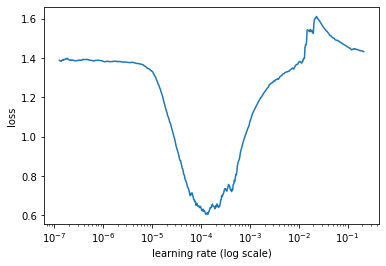

In [4]:
# step 4 [OPTIONAL] estimate the learning rate
learner.lr_find(show_plot=True, max_epochs=2)

In [5]:
# step 5 train the model 
learner.fit_onecycle(5e-5, 4)



begin training using onecycle policy with max lr of 5e-05...
Train for 377 steps, validate for 47 steps
Epoch 1/4
377/377 [==============================] - 2539s 7s/step - loss: 0.6959 - accuracy: 0.7479 - val_loss: 0.1781 - val_accuracy: 0.9434
Epoch 2/4
377/377 [==============================] - 3834s 10s/step - loss: 0.1581 - accuracy: 0.9561 - val_loss: 0.2787 - val_accuracy: 0.9141
Epoch 3/4
377/377 [==============================] - 2730s 7s/step - loss: 0.0758 - accuracy: 0.9792 - val_loss: 0.1917 - val_accuracy: 0.9501
Epoch 4/4
377/377 [==============================] - 3038s 8s/step - loss: 0.0182 - accuracy: 0.9956 - val_loss: 0.1548 - val_accuracy: 0.9554


In [6]:
# step 6 [OPTIONAL] inspect the model
learner.view_top_losses(n=1, preproc=t)
print(x_test[1355])

----------
id:1330 | loss:6.99 | true:comp.graphics | pred:sci.med)

From: lilley@v5.cgu.mcc.ac.uk (Chris Lilley)
Subject: Re: Colour Transform for Red/Green Colour Blindness
Reply-To: C.C.Lilley@mcc.ac.uk
Organization: Computer Graphics Unit, MCC
Lines: 96


In article <geoffw.736035868@extro.ucc.su.OZ.AU>, geoffw@extro.ucc.su.OZ.AU
(Geoffrey Warren Hicks) writes:

>Posted on behalf of Craig Southeren who does not have access to
>a net account:
>-------------------------------------------------------------------

>Can anyone provide me with a colour space transform that would
>emulate the effects of red/green colour blindness? I have had
>a quick look in the computer graphics literature with no results.
>Perhaps someone who has access to medical information could help?
 
Certainly. Reference follows. 

Bear in mind that there are at least two conditions which may be called
red/green colour blind. One, protanopia, is caused by a lack or major
dysfunction of the L cones, those that resp

In [7]:
# step 7 make predictions on new data
predictor = ktrain.get_predictor(learner.model, preproc=t)
predictor.predict('Jesus Christ is the central figure of Christianity.')

'soc.religion.christian'

In [8]:
# step 8 [OPTIONAL] save and load predictor
#predictor.save('./my_20newsgroup_predictor')

#reloaded_predictor = ktrain.load_predictor('./my_20newsgroup_predictor')
#reloaded_predictor.get_classes()

#reloaded_predictor.predict('Jesus Christ is the central figure of Christianity.')

#reloaded_predictor.predict_proba('Jesus Christ is the central figure of Christianity.')

array([3.0939963e-03, 6.7910680e-04, 8.4489456e-04, 9.9538201e-01],
      dtype=float32)